In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
fundamental_data = pd.read_csv(r'../data/scrapped/fundamental_data.csv')
market_data_raw = pd.read_csv(r'../data/scrapped/market_data_raw.csv', header = [0,1], index_col = 0)

In [3]:
fundamental_data.head()

,Ticker,Date,EPS,P/E Ratio,Debt-to-Equity,Revenue,Net Profit,ROE,ROA,Net Profit Margin,...,P/B Ratio,EV/EBITDA,Current Ratio,Free Cash Flow,Operating Cash Flow,Asset Turnover,Inventory Turnover,FCF Yield,Revenue Growth,Earnings Growth
0,RELIANCE,2024-06-30,11.19,34.599810,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RELIANCE,2024-09-30,12.24,30.038831,0.436297,2.315350e+12,1.656300e+11,0.080849,0.036500,0.071536,...,2.428721,18.173137,1.080522,NaN,NaN,0.510235,5.754209,NaN,NaN,0.093834
2,RELIANCE,2024-12-31,13.70,22.091512,NaN,2.399860e+12,1.854000e+11,NaN,NaN,0.077255,...,NaN,11.761683,NaN,NaN,NaN,NaN,NaN,NaN,0.03650,0.119281
3,RELIANCE,2025-03-31,NaN,NaN,0.438301,2.613880e+12,1.940700e+11,0.092064,0.039807,0.074246,...,2.002294,14.778499,1.100351,NaN,NaN,0.536147,7.158275,NaN,0.08918,NaN
4,RELIANCE,2025-06-30,19.95,18.729707,NaN,2.436320e+12,2.699400e+11,NaN,NaN,0.110798,...,NaN,11.444733,NaN,NaN,NaN,NaN,NaN,NaN,-0.06793,NaN


In [4]:
market_data_raw.head()

Ticker     RELIANCE.NS                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2020-01-01  679.082058  683.152975  673.490184  675.324280  14004468   
2020-01-02  676.397959  689.348852  676.397959  686.821289  17710316   
2020-01-03  685.792313  689.661956  681.318790  687.648865  20984698   
2020-01-06  679.976780  683.510829  670.134994  671.700745  24519177   
2020-01-07  679.529321  686.463335  677.068889  682.034546  16683622   

Ticker     HINDUNILVR.NS                                                  ...  \
Price               Open         High          Low        Close   Volume  ...   
Date                                                                      ...   
2020-01-01   1744.012432  1752.958424  1733.168831  1749.931274   543035  ...   
2020-01-02   1753.048784  1764.434543  1744.012450  1751.286743   663275  ...   
2020-01-03   1751.151410  1753.049019  1733.846807  1741.708374  1598825  ...   
2020-01-06   1741.618007  1743.470500  1727.069530  1730.864746   683129  ...   
2020-01-07   1734.298662  1744.916356  1733.169120  1735.608887   808935  ...   

Ticker     BHARTIARTL.NS                                  TATAMOTORS.BO       \
Price               High         Low       Close   Volume          Open High   
Date                                                                           
2020-01-01    440.199069  429.922956  433.316467  5154996           NaN  NaN   
2020-01-02    439.147557  433.507665  435.132721  4933053           NaN  NaN   
2020-01-03    438.956397  431.595869  435.037140  5154587           NaN  NaN   
2020-01-06    437.283498  425.047773  429.827362  7538915           NaN  NaN   
2020-01-07    435.228335  423.566173  425.477997  4353883           NaN  NaN   

Ticker                                 
Price      Low Close Adj Close Volume  
Date                                   
2020-01-01 NaN   NaN       NaN    NaN  
2020-01-02 NaN   NaN       NaN    NaN  
2020-01-03 NaN   NaN       NaN    NaN  
2020-01-06 NaN   NaN       NaN    NaN  
2020-01-07 NaN   NaN       NaN    NaN  

[5 rows x 31 columns]

# Cleaning market_data_raw.csv

In [5]:
# Removing empty columns from market_data_raw

market_data_raw = market_data_raw.drop(columns = ['TATAMOTORS.BO'])
print(market_data_raw.shape)
market_data_raw.head()

(1486, 25)


Ticker     RELIANCE.NS                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2020-01-01  679.082058  683.152975  673.490184  675.324280  14004468   
2020-01-02  676.397959  689.348852  676.397959  686.821289  17710316   
2020-01-03  685.792313  689.661956  681.318790  687.648865  20984698   
2020-01-06  679.976780  683.510829  670.134994  671.700745  24519177   
2020-01-07  679.529321  686.463335  677.068889  682.034546  16683622   

Ticker     HINDUNILVR.NS                                                  ...  \
Price               Open         High          Low        Close   Volume  ...   
Date                                                                      ...   
2020-01-01   1744.012432  1752.958424  1733.168831  1749.931274   543035  ...   
2020-01-02   1753.048784  1764.434543  1744.012450  1751.286743   663275  ...   
2020-01-03   1751.151410  1753.049019  1733.846807  1741.708374  1598825  ...   
2020-01-06   1741.618007  1743.470500  1727.069530  1730.864746   683129  ...   
2020-01-07   1734.298662  1744.916356  1733.169120  1735.608887   808935  ...   

Ticker         INFY.NS                                               \
Price             Open        High         Low       Close   Volume   
Date                                                                  
2020-01-01  631.561439  635.857775  629.456223  633.151062  2112415   
2020-01-02  634.912706  636.545282  628.038566  631.303772  5658200   
2020-01-03  630.616314  642.731962  630.616314  641.013428  7882938   
2020-01-06  641.099255  647.715623  632.850311  634.869568  6519403   
2020-01-07  634.139272  638.091881  623.054703  625.460693  7899363   

Ticker     BHARTIARTL.NS                                               
Price               Open        High         Low       Close   Volume  
Date                                                                   
2020-01-01    435.945225  440.199069  429.922956  433.316467  5154996  
2020-01-02    434.081200  439.147557  433.507665  435.132721  4933053  
2020-01-03    435.610705  438.956397  431.595869  435.037140  5154587  
2020-01-06    433.889988  437.283498  425.047773  429.827362  7538915  
2020-01-07    432.073831  435.228335  423.566173  425.477997  4353883  

[5 rows x 25 columns]

In [6]:
market_data_raw.drop_duplicates(inplace = True)
print(market_data_raw.shape)
market_data_raw.head()


(1486, 25)


Ticker     RELIANCE.NS                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2020-01-01  679.082058  683.152975  673.490184  675.324280  14004468   
2020-01-02  676.397959  689.348852  676.397959  686.821289  17710316   
2020-01-03  685.792313  689.661956  681.318790  687.648865  20984698   
2020-01-06  679.976780  683.510829  670.134994  671.700745  24519177   
2020-01-07  679.529321  686.463335  677.068889  682.034546  16683622   

Ticker     HINDUNILVR.NS                                                  ...  \
Price               Open         High          Low        Close   Volume  ...   
Date                                                                      ...   
2020-01-01   1744.012432  1752.958424  1733.168831  1749.931274   543035  ...   
2020-01-02   1753.048784  1764.434543  1744.012450  1751.286743   663275  ...   
2020-01-03   1751.151410  1753.049019  1733.846807  1741.708374  1598825  ...   
2020-01-06   1741.618007  1743.470500  1727.069530  1730.864746   683129  ...   
2020-01-07   1734.298662  1744.916356  1733.169120  1735.608887   808935  ...   

Ticker         INFY.NS                                               \
Price             Open        High         Low       Close   Volume   
Date                                                                  
2020-01-01  631.561439  635.857775  629.456223  633.151062  2112415   
2020-01-02  634.912706  636.545282  628.038566  631.303772  5658200   
2020-01-03  630.616314  642.731962  630.616314  641.013428  7882938   
2020-01-06  641.099255  647.715623  632.850311  634.869568  6519403   
2020-01-07  634.139272  638.091881  623.054703  625.460693  7899363   

Ticker     BHARTIARTL.NS                                               
Price               Open        High         Low       Close   Volume  
Date                                                                   
2020-01-01    435.945225  440.199069  429.922956  433.316467  5154996  
2020-01-02    434.081200  439.147557  433.507665  435.132721  4933053  
2020-01-03    435.610705  438.956397  431.595869  435.037140  5154587  
2020-01-06    433.889988  437.283498  425.047773  429.827362  7538915  
2020-01-07    432.073831  435.228335  423.566173  425.477997  4353883  

[5 rows x 25 columns]

In [7]:
missing_percent = market_data_raw.isnull().sum() * 100 / len(market_data_raw)
missing_percent

Ticker         Price 
RELIANCE.NS    Open      0.0
               High      0.0
               Low       0.0
               Close     0.0
               Volume    0.0
HINDUNILVR.NS  Open      0.0
               High      0.0
               Low       0.0
               Close     0.0
               Volume    0.0
HDFCBANK.NS    Open      0.0
               High      0.0
               Low       0.0
               Close     0.0
               Volume    0.0
INFY.NS        Open      0.0
               High      0.0
               Low       0.0
               Close     0.0
               Volume    0.0
BHARTIARTL.NS  Open      0.0
               High      0.0
               Low       0.0
               Close     0.0
               Volume    0.0
dtype: float64

In [8]:
market_data_cleaned = market_data_raw.stack(level=0)
market_data_cleaned.head()

Price                            Open         High          Low        Close  \
Date       Ticker                                                              
2020-01-01 BHARTIARTL.NS   435.945225   440.199069   429.922956   433.316467   
           HDFCBANK.NS     604.345388   606.192392   601.740655   605.529358   
           HINDUNILVR.NS  1744.012432  1752.958424  1733.168831  1749.931274   
           INFY.NS         631.561439   635.857775   629.456223   633.151062   
           RELIANCE.NS     679.082058   683.152975   673.490184   675.324280   

Price                       Volume  
Date       Ticker                   
2020-01-01 BHARTIARTL.NS   5154996  
           HDFCBANK.NS     3673698  
           HINDUNILVR.NS    543035  
           INFY.NS         2112415  
           RELIANCE.NS    14004468

In [9]:
market_data_cleaned = market_data_cleaned.reset_index()
market_data_cleaned = market_data_cleaned.rename(columns={'level_1': 'Ticker'})
market_data_cleaned['Date'] = pd.to_datetime(market_data_cleaned['Date'])
market_data_cleaned

Price,Date,Ticker,Open,High,Low,Close,Volume
0,2020-01-01,BHARTIARTL.NS,435.945225,440.199069,429.922956,433.316467,5154996
1,2020-01-01,HDFCBANK.NS,604.345388,606.192392,601.740655,605.529358,3673698
2,2020-01-01,HINDUNILVR.NS,1744.012432,1752.958424,1733.168831,1749.931274,543035
3,2020-01-01,INFY.NS,631.561439,635.857775,629.456223,633.151062,2112415
4,2020-01-01,RELIANCE.NS,679.082058,683.152975,673.490184,675.324280,14004468
...,...,...,...,...,...,...,...
7425,2025-12-30,BHARTIARTL.NS,2077.000000,2102.800049,2071.600098,2099.800049,6983390
7426,2025-12-30,HDFCBANK.NS,990.200012,995.000000,982.200012,990.900024,33155849
7427,2025-12-30,HINDUNILVR.NS,2293.300049,2298.000000,2283.000000,2290.199951,1556717
7428,2025-12-30,INFY.NS,1647.000000,1647.900024,1616.800049,1621.599976,9395937


In [10]:
market_data_cleaned.drop_duplicates(inplace=True)
market_data_cleaned

Price,Date,Ticker,Open,High,Low,Close,Volume
0,2020-01-01,BHARTIARTL.NS,435.945225,440.199069,429.922956,433.316467,5154996
1,2020-01-01,HDFCBANK.NS,604.345388,606.192392,601.740655,605.529358,3673698
2,2020-01-01,HINDUNILVR.NS,1744.012432,1752.958424,1733.168831,1749.931274,543035
3,2020-01-01,INFY.NS,631.561439,635.857775,629.456223,633.151062,2112415
4,2020-01-01,RELIANCE.NS,679.082058,683.152975,673.490184,675.324280,14004468
...,...,...,...,...,...,...,...
7425,2025-12-30,BHARTIARTL.NS,2077.000000,2102.800049,2071.600098,2099.800049,6983390
7426,2025-12-30,HDFCBANK.NS,990.200012,995.000000,982.200012,990.900024,33155849
7427,2025-12-30,HINDUNILVR.NS,2293.300049,2298.000000,2283.000000,2290.199951,1556717
7428,2025-12-30,INFY.NS,1647.000000,1647.900024,1616.800049,1621.599976,9395937


In [11]:
market_data_cleaned.to_csv(r'../data/processed/market_data_cleaned.csv')

# Cleaning fundamental_data.csv

In [12]:
# Cleaning fundamental_data

missing_percent = fundamental_data.isnull().sum() * 100 / len(fundamental_data)
missing_percent

Ticker                  0.000000
Date                    0.000000
EPS                    25.806452
P/E Ratio              25.806452
Debt-to-Equity         38.709677
Revenue                19.354839
Net Profit             19.354839
ROE                    41.935484
ROA                    41.935484
Net Profit Margin      19.354839
Operating Margin       35.483871
P/B Ratio              38.709677
EV/EBITDA              32.258065
Current Ratio          54.838710
Free Cash Flow         74.193548
Operating Cash Flow    74.193548
Asset Turnover         41.935484
Inventory Turnover     80.645161
FCF Yield              74.193548
Revenue Growth         38.709677
Earnings Growth        64.516129
dtype: float64

In [13]:
cols = missing_percent[missing_percent > 50].index
fundamental_data.drop(columns = cols, inplace = True)
fundamental_data.head()

,Ticker,Date,EPS,P/E Ratio,Debt-to-Equity,Revenue,Net Profit,ROE,ROA,Net Profit Margin,Operating Margin,P/B Ratio,EV/EBITDA,Asset Turnover,Revenue Growth
0,RELIANCE,2024-06-30,11.19,34.599810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RELIANCE,2024-09-30,12.24,30.038831,0.436297,2.315350e+12,1.656300e+11,0.080849,0.036500,0.071536,0.134122,2.428721,18.173137,0.510235,NaN
2,RELIANCE,2024-12-31,13.70,22.091512,NaN,2.399860e+12,1.854000e+11,NaN,NaN,0.077255,0.145100,NaN,11.761683,NaN,0.03650
3,RELIANCE,2025-03-31,NaN,NaN,0.438301,2.613880e+12,1.940700e+11,0.092064,0.039807,0.074246,0.126670,2.002294,14.778499,0.536147,0.08918
4,RELIANCE,2025-06-30,19.95,18.729707,NaN,2.436320e+12,2.699400e+11,NaN,NaN,0.110798,0.181347,NaN,11.444733,NaN,-0.06793


In [14]:
fundamental_data['Date'] = pd.to_datetime(fundamental_data['Date'])
fundamental_data.sort_values(by = 'Ticker')
fundamental_data.head()

,Ticker,Date,EPS,P/E Ratio,Debt-to-Equity,Revenue,Net Profit,ROE,ROA,Net Profit Margin,Operating Margin,P/B Ratio,EV/EBITDA,Asset Turnover,Revenue Growth
0,RELIANCE,2024-06-30,11.19,34.599810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RELIANCE,2024-09-30,12.24,30.038831,0.436297,2.315350e+12,1.656300e+11,0.080849,0.036500,0.071536,0.134122,2.428721,18.173137,0.510235,NaN
2,RELIANCE,2024-12-31,13.70,22.091512,NaN,2.399860e+12,1.854000e+11,NaN,NaN,0.077255,0.145100,NaN,11.761683,NaN,0.03650
3,RELIANCE,2025-03-31,NaN,NaN,0.438301,2.613880e+12,1.940700e+11,0.092064,0.039807,0.074246,0.126670,2.002294,14.778499,0.536147,0.08918
4,RELIANCE,2025-06-30,19.95,18.729707,NaN,2.436320e+12,2.699400e+11,NaN,NaN,0.110798,0.181347,NaN,11.444733,NaN,-0.06793


In [15]:
fundamental_data = fundamental_data.fillna(fundamental_data.median(numeric_only=True))
fundamental_data.head() 

,Ticker,Date,EPS,P/E Ratio,Debt-to-Equity,Revenue,Net Profit,ROE,ROA,Net Profit Margin,Operating Margin,P/B Ratio,EV/EBITDA,Asset Turnover,Revenue Growth
0,RELIANCE,2024-06-30,11.19,34.599810,0.954306,4.512930e+11,6.630500e+10,0.199114,0.065953,0.163732,0.225740,9.254817,24.219855,0.447192,0.033135
1,RELIANCE,2024-09-30,12.24,30.038831,0.436297,2.315350e+12,1.656300e+11,0.080849,0.036500,0.071536,0.134122,2.428721,18.173137,0.510235,0.033135
2,RELIANCE,2024-12-31,13.70,22.091512,0.954306,2.399860e+12,1.854000e+11,0.199114,0.065953,0.077255,0.145100,9.254817,11.761683,0.447192,0.036500
3,RELIANCE,2025-03-31,11.11,46.013988,0.438301,2.613880e+12,1.940700e+11,0.092064,0.039807,0.074246,0.126670,2.002294,14.778499,0.536147,0.089180
4,RELIANCE,2025-06-30,19.95,18.729707,0.954306,2.436320e+12,2.699400e+11,0.199114,0.065953,0.110798,0.181347,9.254817,11.444733,0.447192,-0.067930


In [16]:
fundamental_data

,Ticker,Date,EPS,P/E Ratio,Debt-to-Equity,Revenue,Net Profit,ROE,ROA,Net Profit Margin,Operating Margin,P/B Ratio,EV/EBITDA,Asset Turnover,Revenue Growth
0,RELIANCE,2024-06-30,11.190,34.599810,0.954306,4.512930e+11,6.630500e+10,0.199114,0.065953,0.163732,0.225740,9.254817,24.219855,0.447192,0.033135
1,RELIANCE,2024-09-30,12.240,30.038831,0.436297,2.315350e+12,1.656300e+11,0.080849,0.036500,0.071536,0.134122,2.428721,18.173137,0.510235,0.033135
2,RELIANCE,2024-12-31,13.700,22.091512,0.954306,2.399860e+12,1.854000e+11,0.199114,0.065953,0.077255,0.145100,9.254817,11.761683,0.447192,0.036500
3,RELIANCE,2025-03-31,11.110,46.013988,0.438301,2.613880e+12,1.940700e+11,0.092064,0.039807,0.074246,0.126670,2.002294,14.778499,0.536147,0.089180
4,RELIANCE,2025-06-30,19.950,18.729707,0.954306,2.436320e+12,2.699400e+11,0.199114,0.065953,0.110798,0.181347,9.254817,11.444733,0.447192,-0.067930
5,RELIANCE,2025-09-30,11.110,46.013988,0.954306,4.512930e+11,6.630500e+10,0.199114,0.065953,0.163732,0.225740,9.254817,24.219855,0.447192,0.033135
6,RELIANCE,2025-12-31,13.780,28.490566,0.954306,2.649050e+12,1.864500e+11,0.199114,0.065953,0.070384,0.137068,9.254817,14.631916,0.447192,0.033135
7,HDFCBANK,2024-06-30,10.835,19.409992,1.415097,7.241699e+11,1.647485e+11,0.138492,0.016448,0.227500,0.225740,2.720442,24.219855,0.072299,0.033135
8,HDFCBANK,2024-09-30,11.110,46.013988,1.043601,1.955545e+11,1.738105e+11,0.095707,0.015212,0.888808,0.225740,1.810045,24.219855,0.017115,-0.729960
9,HDFCBANK,2024-12-31,23.110,9.461305,1.301248,6.527966e+11,1.765661e+11,0.140637,0.016704,0.270476,0.225740,2.679941,24.219855,0.061757,2.338182


In [17]:
fundamental_data = fundamental_data.drop_duplicates()
fundamental_data

,Ticker,Date,EPS,P/E Ratio,Debt-to-Equity,Revenue,Net Profit,ROE,ROA,Net Profit Margin,Operating Margin,P/B Ratio,EV/EBITDA,Asset Turnover,Revenue Growth
0,RELIANCE,2024-06-30,11.190,34.599810,0.954306,4.512930e+11,6.630500e+10,0.199114,0.065953,0.163732,0.225740,9.254817,24.219855,0.447192,0.033135
1,RELIANCE,2024-09-30,12.240,30.038831,0.436297,2.315350e+12,1.656300e+11,0.080849,0.036500,0.071536,0.134122,2.428721,18.173137,0.510235,0.033135
2,RELIANCE,2024-12-31,13.700,22.091512,0.954306,2.399860e+12,1.854000e+11,0.199114,0.065953,0.077255,0.145100,9.254817,11.761683,0.447192,0.036500
3,RELIANCE,2025-03-31,11.110,46.013988,0.438301,2.613880e+12,1.940700e+11,0.092064,0.039807,0.074246,0.126670,2.002294,14.778499,0.536147,0.089180
4,RELIANCE,2025-06-30,19.950,18.729707,0.954306,2.436320e+12,2.699400e+11,0.199114,0.065953,0.110798,0.181347,9.254817,11.444733,0.447192,-0.067930
5,RELIANCE,2025-09-30,11.110,46.013988,0.954306,4.512930e+11,6.630500e+10,0.199114,0.065953,0.163732,0.225740,9.254817,24.219855,0.447192,0.033135
6,RELIANCE,2025-12-31,13.780,28.490566,0.954306,2.649050e+12,1.864500e+11,0.199114,0.065953,0.070384,0.137068,9.254817,14.631916,0.447192,0.033135
7,HDFCBANK,2024-06-30,10.835,19.409992,1.415097,7.241699e+11,1.647485e+11,0.138492,0.016448,0.227500,0.225740,2.720442,24.219855,0.072299,0.033135
8,HDFCBANK,2024-09-30,11.110,46.013988,1.043601,1.955545e+11,1.738105e+11,0.095707,0.015212,0.888808,0.225740,1.810045,24.219855,0.017115,-0.729960
9,HDFCBANK,2024-12-31,23.110,9.461305,1.301248,6.527966e+11,1.765661e+11,0.140637,0.016704,0.270476,0.225740,2.679941,24.219855,0.061757,2.338182


In [18]:
fundamental_data.to_csv (r'../data/processed/fundamental_data.csv', index = False)

# Visualising the Data

In [19]:
market_data_cleaned['Date'] = pd.to_datetime(market_data_cleaned['Date'])
fundamental_data['Date'] = pd.to_datetime(fundamental_data['Date'])

market_data_cleaned = market_data_cleaned.sort_values('Date')
fundamental_data = fundamental_data.sort_values('Date')

In [20]:
# Merge on Date
df = pd.merge(
    market_data_cleaned,
    fundamental_data,
    on='Date',
    how='left'
)

df = df.sort_values('Date')
df = df.ffill()

print("Final Shape:", df.shape)
df.head()

Final Shape: (7495, 21)


,Date,Ticker_x,Open,High,Low,Close,Volume,Ticker_y,EPS,P/E Ratio,...,Revenue,Net Profit,ROE,ROA,Net Profit Margin,Operating Margin,P/B Ratio,EV/EBITDA,Asset Turnover,Revenue Growth
0,2020-01-01,BHARTIARTL.NS,435.945225,440.199069,429.922956,433.316467,5154996,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,HDFCBANK.NS,604.345388,606.192392,601.740655,605.529358,3673698,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,HINDUNILVR.NS,1744.012432,1752.958424,1733.168831,1749.931274,543035,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01,INFY.NS,631.561439,635.857775,629.456223,633.151062,2112415,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01,RELIANCE.NS,679.082058,683.152975,673.490184,675.324280,14004468,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


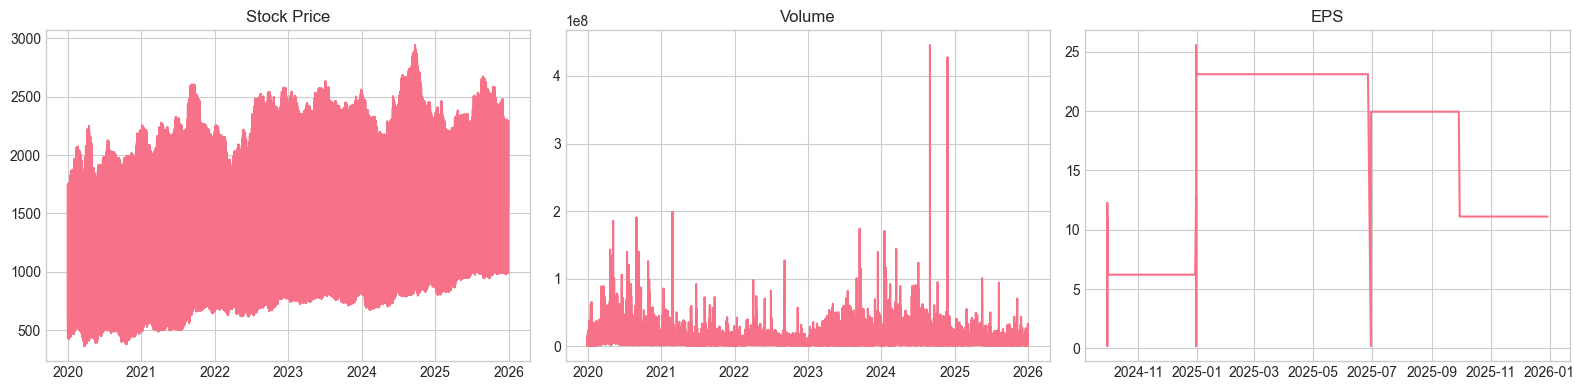

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

fig, axes = plt.subplots(1, 3, figsize=(16,4))

# Price
axes[0].plot(df['Date'], df['Close'])
axes[0].set_title("Stock Price")

# Volume
axes[1].plot(df['Date'], df['Volume'])
axes[1].set_title("Volume")

# Pick first numeric fundamental column safely
fund_numeric_cols = df.select_dtypes(include='number').columns.tolist()
fund_numeric_cols = [c for c in fund_numeric_cols if c not in ['Open','High','Low','Close','Volume']]

if len(fund_numeric_cols) > 0:
    axes[2].plot(df['Date'], df[fund_numeric_cols[0]])
    axes[2].set_title(fund_numeric_cols[0])

plt.tight_layout()
plt.show()

In [27]:
def create_technical_features(df):
    df = df.copy()
    eps = 1e-9

    df['Buying_Pressure']  = (df['Close'] - df['Low'])  / (df['High'] - df['Low'] + eps)
    df['Selling_Pressure'] = (df['High'] - df['Close']) / (df['High'] - df['Low'] + eps)

    for window in [5, 10, 20, 50]:
        df[f'SMA_{window}'] = df['Close'].rolling(window).mean()

    for span in [12, 26]:
        df[f'EMA_{span}'] = df['Close'].ewm(span=span, adjust=False).mean()

    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(14).mean()
    rs = gain / (loss + 1e-9)
    df['RSI_14'] = 100 - (100 / (1 + rs))

    df['BB_middle'] = df['Close'].rolling(20).mean()
    df['BB_std'] = df['Close'].rolling(20).std()
    df['BB_upper'] = df['BB_middle'] + 2 * df['BB_std']
    df['BB_lower'] = df['BB_middle'] - 2 * df['BB_std']

    df['return_pct'] = df['Close'].pct_change() * 100
    for lag in [1,2,3,5]:
        df[f'return_lag{lag}'] = df['return_pct'].shift(lag)
        df[f'volume_lag{lag}'] = df['Volume'].shift(lag)

    return df

df = create_technical_features(df)

df.head

<bound method NDFrame.head of            Date       Ticker_x         Open         High          Low  \
0    2020-01-01  BHARTIARTL.NS   435.945225   440.199069   429.922956   
1    2020-01-01    HDFCBANK.NS   604.345388   606.192392   601.740655   
2    2020-01-01  HINDUNILVR.NS  1744.012432  1752.958424  1733.168831   
3    2020-01-01        INFY.NS   631.561439   635.857775   629.456223   
4    2020-01-01    RELIANCE.NS   679.082058   683.152975   673.490184   
...         ...            ...          ...          ...          ...   
7492 2025-12-30    HDFCBANK.NS   990.200012   995.000000   982.200012   
7493 2025-12-30  HINDUNILVR.NS  2293.300049  2298.000000  2283.000000   
7490 2025-12-30        INFY.NS  1647.000000  1647.900024  1616.800049   
7491 2025-12-30  BHARTIARTL.NS  2077.000000  2102.800049  2071.600098   
7494 2025-12-30    RELIANCE.NS  1547.000000  1553.599976  1537.800049   

            Close    Volume Ticker_y    EPS  P/E Ratio  ...    BB_lower  \
0      433.316467 

In [28]:
df['Target'] = df['Close'].pct_change().shift(-1) * 100

In [29]:
df = df.dropna()

numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
features = [c for c in numeric_cols if c not in ['target']]

print("Total Features:", len(features))

Total Features: 43


In [31]:
from sklearn.feature_selection import mutual_info_regression

X = df[features]
y = df['Target']

mi_scores = mutual_info_regression(X, y, random_state=42)

mi_df = pd.DataFrame({
    'Feature': features,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

mi_df.head(20)

,Feature,MI Score
42,Target,6.066066
1,High,1.318445
3,Close,1.293217
0,Open,1.262048
2,Low,1.256729
33,return_pct,0.974306
28,RSI_14,0.711915
34,return_lag1,0.510508
4,Volume,0.462619
26,MACD,0.409218


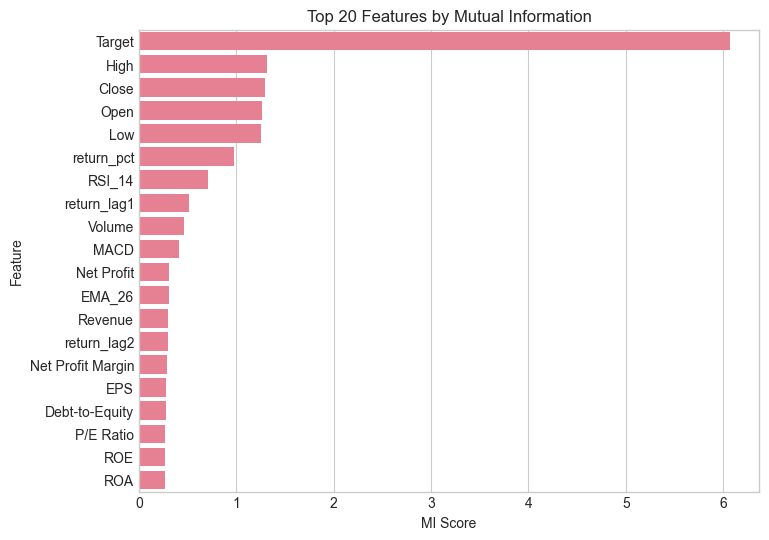

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(data=mi_df.head(20), x='MI Score', y='Feature')
plt.title("Top 20 Features by Mutual Information")
plt.show()

In [33]:
print(market_data_cleaned.columns)

Index(['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object', name='Price')
